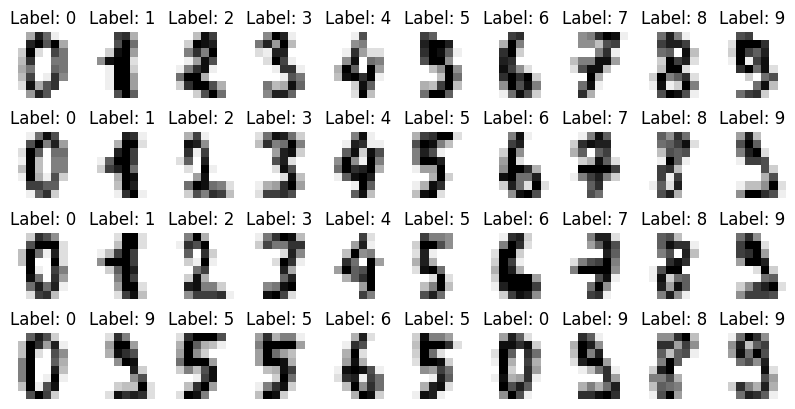

In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA

# Import the digits dataset
digits = datasets.load_digits()

# Plot a sample of all the digits in the database
_, axes0 = plt.subplots(nrows=4, ncols=10, figsize=(10, 5))
axes = []
for irow in range(0, len(axes0)):
    for ax in axes0[irow]:
        axes.append(ax)

for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)

The shape of the data array is (1797, 64)

Predicted vs original label (P:L)
Confusion matrix:
[[ 84   0   0   0   0   0   0   0   0   0]
 [  0  86   0   0   0   0   0   0   0   0]
 [  0   0  99   0   0   0   0   0   0   0]
 [  0   0   0 105   0   0   0   0   0   0]
 [  0   0   0   0  96   0   0   0   2   0]
 [  0   0   0   0   0  82   1   0   0   1]
 [  0   0   0   0   0   0  87   0   0   0]
 [  0   0   0   0   0   0   0  88   0   1]
 [  0   0   0   0   0   0   0   0  87   0]
 [  0   0   0   0   0   1   0   0   1  78]]


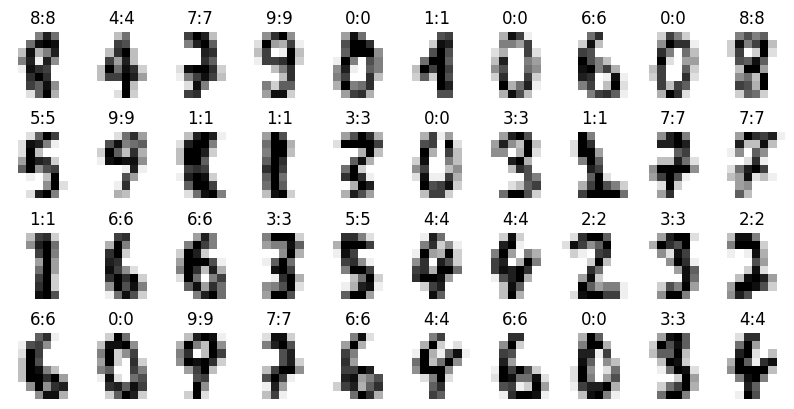

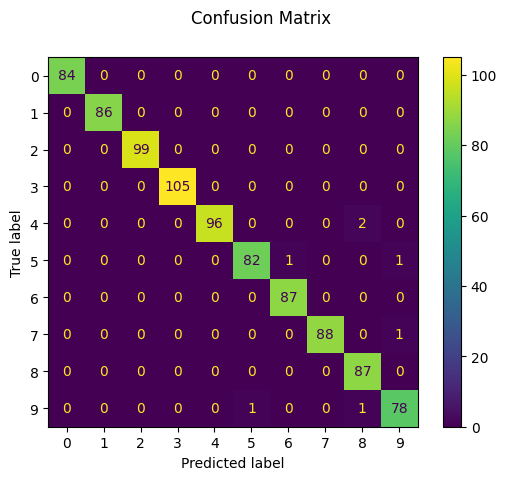

In [2]:
# Flatten the images
# We do this so that the 8x8 pixel matrices are turned into 64D vectors
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print("The shape of the data array is " + str(data.shape))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=True
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

# Plot a sample of test set predictions
print("")
print("Predicted vs original label (P:L)")
_, axes0 = plt.subplots(nrows=4, ncols=10, figsize=(10, 5))
axes = []
for irow in range(0, len(axes0)):
    for ax in axes0[irow]:
        axes.append(ax)

for ax, image, prediction, label in zip(axes, X_test, predicted, y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{prediction}:{label}")

# Build and plot the confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Confusion matrix:
[[141   0   0   0   0   0   0   0   0   0]
 [  0 142   0   0   0   0   0   0   0   0]
 [  0   1 139   0   0   0   0   1   0   0]
 [  0   0   0 141   0   2   0   2   8   1]
 [  0   0   0   0 141   0   0   1   3   0]
 [  0   0   0   0   1 139   1   0   0   1]
 [  0   0   0   0   0   0 146   0   1   0]
 [  0   0   0   0   0   0   0 147   0   0]
 [  0   6   0   0   0   0   0   0 129   0]
 [  0   1   0   1   0   3   0   7   8 124]]


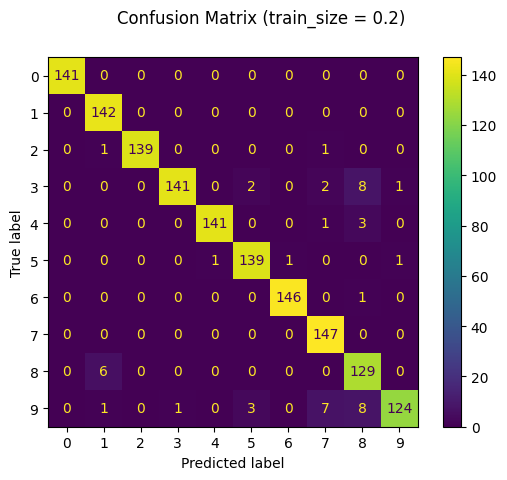

Confusion matrix:
[[158   0   0   0   1   0   0   0   0   0]
 [  0 156   0   0   0   1   0   0   1   0]
 [  0   6 148   1   0   0   0   2   8   2]
 [  0   0   0 143   0   2   0   5  10   3]
 [  0   0   0   0 158   0   0   0   0   0]
 [  0   0   0   0   0 159   1   0   1   4]
 [  1   3   0   0   0   2 157   0   1   0]
 [  0   1   0   0   4   0   0 159   1   1]
 [  0  12   0   2   0   1   0   1 137   4]
 [  0   0   0   0   0   1   0   3   1 156]]


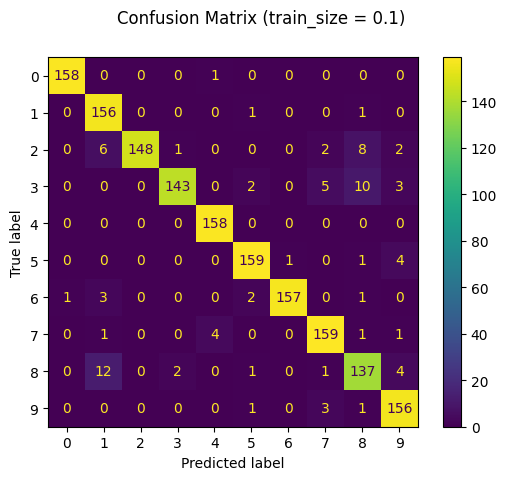

Confusion matrix:
[[164   0   0   0   1   0   0   0   0   0]
 [  0 158   2   0   0   0   0   0   0  10]
 [  0   2 150   0   0   0   0   1  13   3]
 [  0   3   0 142   0   4   0   7   6  13]
 [  1   2   0   0 166   0   0   4   0   1]
 [  0   0   0   0   1 157   0   0   0  15]
 [  0   5   0   0   0   1 170   0   0   0]
 [  0   3   0   0   6   0   0 160   0   2]
 [  0  21   1   0   0   2   2   1 130   9]
 [  0   1   0   4   0   4   0   8   1 151]]


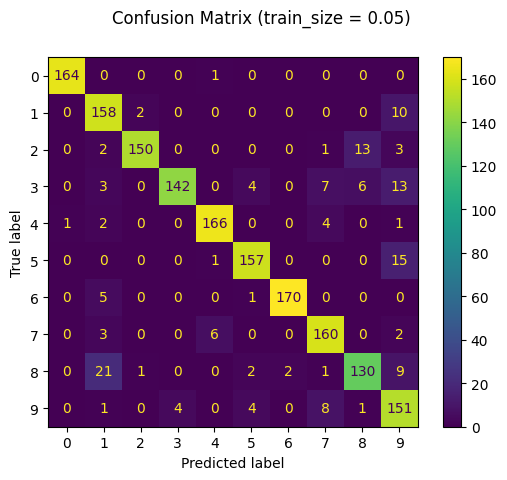

Confusion matrix:
[[171   0   0   0   2   0   1   0   0   0]
 [  0  18   0  17  13   0   6  75   0  51]
 [  0   0 100  69   0   0   0   3   0   2]
 [  0   0   0 163   0   0   0   8   0   8]
 [  0   0   0   0 142   0   0  23   0  12]
 [  0   0   0  48   0   0   2  68   0  64]
 [  0   0   0   0   0   0 173   0   0   4]
 [  0   0   0   4   0   0   0 152   0  17]
 [  0   0   0  52   0   0   2  40  70   7]
 [  0   0   0  10   0   0   0   9   1 155]]


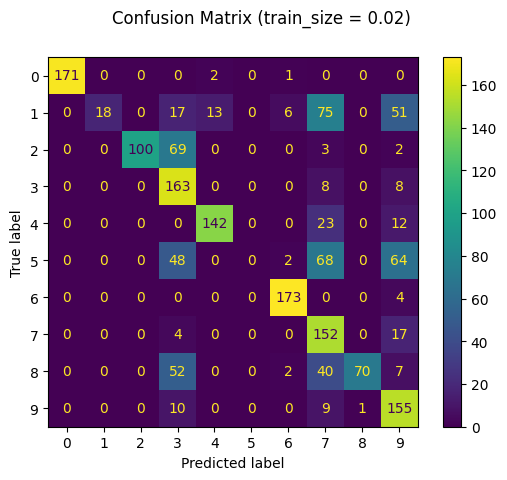

Confusion matrix:
[[  1   0   0   0   0 174   0   0   0   2]
 [  0 105   0   0   1  72   0   0   1   0]
 [  0  24   5   0   0 147   0   0   0   0]
 [  0   0   0   2   0 147   0   0   0  33]
 [  0   3   0   0 102  74   0   0   0   0]
 [  0   0   0   0   0 177   0   0   0   1]
 [  0  17   0   0   2 162   0   0   0   0]
 [  0   7   0   0   0 169   0   2   0   0]
 [  0  37   0   0   0  98   0   0  36   1]
 [  0   0   0   0   0  81   0   0   0  97]]


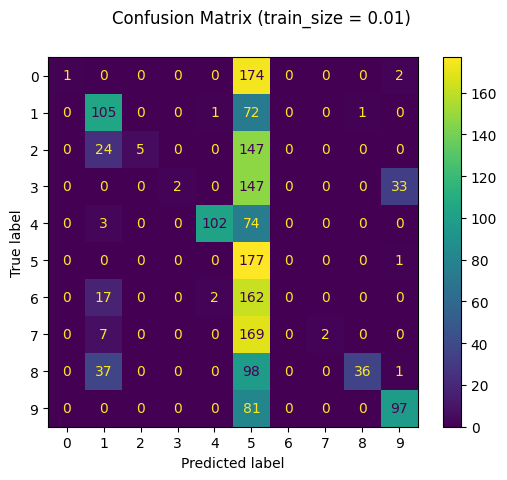

Confusion matrix:
[[102   0   0   0   0   0   0   0  75   0]
 [  0  32   0   0   0   0   0   0 149   0]
 [  0   0   0   0   0   0   0   0 177   0]
 [  0   0   0  51   0   0   0   0 129   2]
 [  0   0   0   0   0   0   0   0 181   0]
 [  0   0   0   2   0   0   0   0 176   4]
 [  0   0   0   0   0   0  63   0 117   0]
 [  0   0   0   0   0   0   0  38 140   0]
 [  0   1   0   0   0   0   0   0 171   0]
 [  0   2   0  14   0   0   0   0  96  67]]


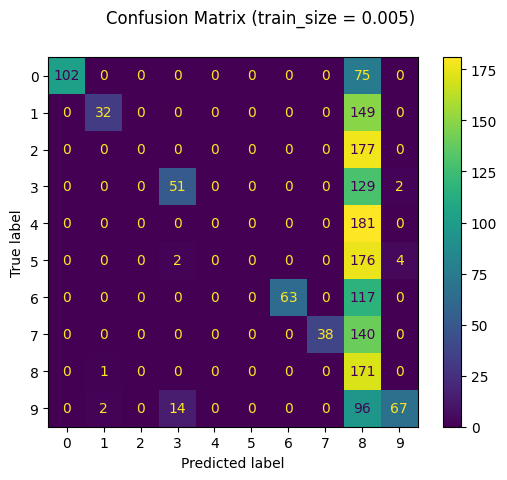

Confusion matrix:
[[  0   0   0   0 178   0   0   0   0   0]
 [  0   0   0   0 182   0   0   0   0   0]
 [  0   0   0   5 172   0   0   0   0   0]
 [  0   0   0 123  59   0   0   0   0   0]
 [  0   0   0   0 179   0   0   0   0   0]
 [  0   0   0  22 160   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0 179   0   0   0   0   0]
 [  0   0   0   6 168   0   0   0   0   0]
 [  0   0   0  71 109   0   0   0   0   0]]


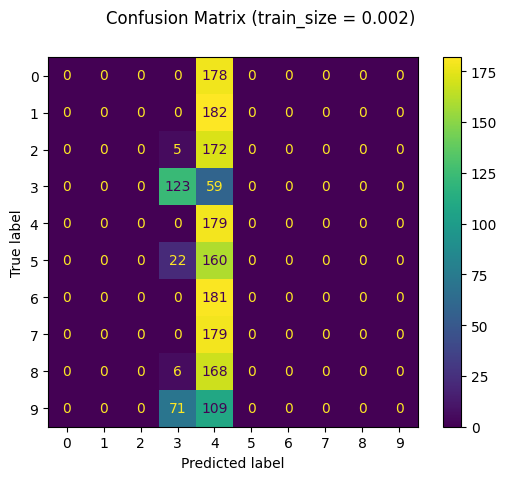

In [3]:
# Now let's try with different amounts of training data
for train_size in [0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002]:
    clf = svm.SVC(gamma=0.001) # we need to reinitialize the SVM
    X_train, X_test, y_train, y_test = train_test_split(
        data, digits.target, test_size=(1.-train_size), shuffle=True
    )
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.figure_.suptitle("Confusion Matrix (train_size = " + str(train_size) + ")")
    print(f"Confusion matrix:\n{disp.confusion_matrix}")
    plt.show()

Confusion matrix:
[[77  0  0  0  1  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  0  0]
 [ 0  0 81  0  0  0  0  1  0  0]
 [ 0  0  0 94  0  1  0  0  1  0]
 [ 0  0  0  0 93  0  0  0  1  0]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 95  0  1  0]
 [ 0  0  0  0  0  0  0 96  0  1]
 [ 0  2  0  0  0  0  0  0 83  0]
 [ 0  1  0  0  0  0  0  1  0 89]]


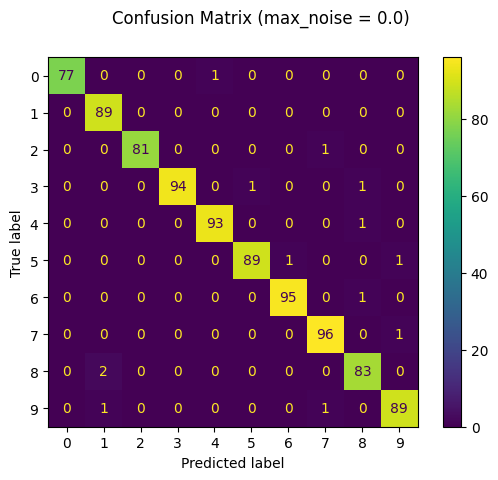

Confusion matrix:
[[ 88   0   0   0   1   0   0   0   0   0]
 [  0 101   0   0   0   0   0   0   0   0]
 [  0   1  84   0   0   0   0   1   0   0]
 [  0   0   0  88   0   0   0   1   0   0]
 [  0   0   0   0  84   0   0   0   0   1]
 [  0   0   0   0   0  93   1   0   0   2]
 [  0   1   0   0   0   0  89   0   0   0]
 [  0   0   0   0   0   0   0  80   0   0]
 [  0   4   0   0   0   0   0   0  82   0]
 [  0   0   0   1   0   0   0   0   0  96]]


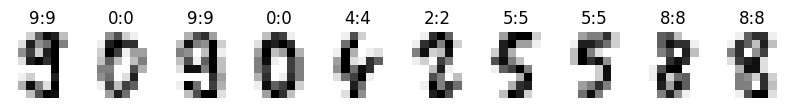

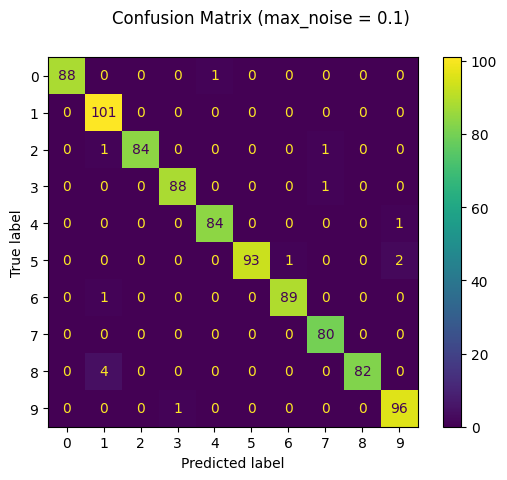

Confusion matrix:
[[93  0  0  0  1  0  0  0  0  0]
 [ 0 91  0  0  0  0  0  0  0  0]
 [ 0  0 76  0  0  0  0  0  0  0]
 [ 0  0  1 94  0  0  0  1  0  0]
 [ 0  0  0  0 87  0  0  2  0  1]
 [ 0  0  0  0  0 92  1  0  0  2]
 [ 0  0  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  0  0 99  0  0]
 [ 0  3  0  0  0  0  0  0 83  0]
 [ 0  0  0  0  0  0  0  0  1 81]]


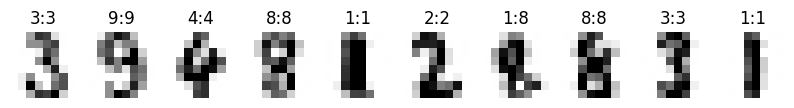

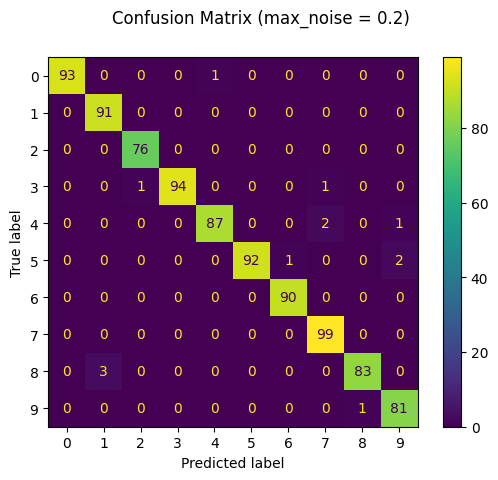

Confusion matrix:
[[85  0  0  0  0  0  0  0  0  0]
 [ 0 83  0  0  0  0  0  0  0  0]
 [ 0  0 89  0  0  0  0  0  0  0]
 [ 0  0  0 96  0  2  0  1  1  0]
 [ 0  0  0  0 88  0  0  0  0  2]
 [ 0  0  0  0  0 89  1  0  0  0]
 [ 0  0  0  0  0  0 82  0  0  0]
 [ 0  0  0  0  0  0  0 92  0  1]
 [ 0  0  0  1  0  0  0  0 89  0]
 [ 0  0  0  0  0  0  0  0  1 96]]


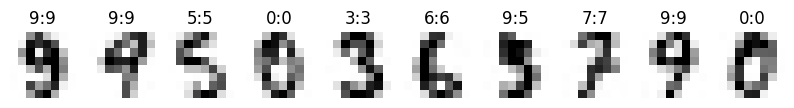

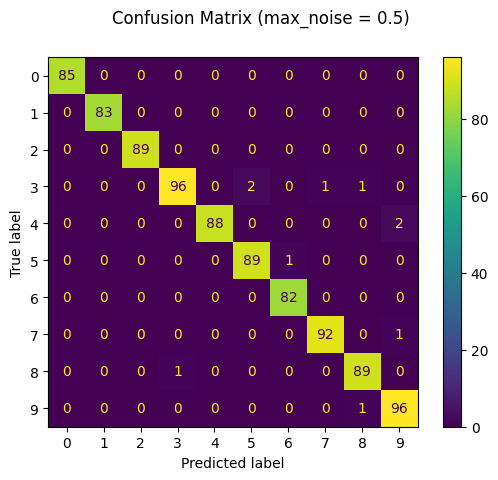

Confusion matrix:
[[85  0  0  0  1  0  0  0  0  0]
 [ 0 86  0  0  0  0  0  0  0  0]
 [ 0  0 88  0  0  0  0  1  0  0]
 [ 0  0  0 83  0  1  0  1  1  0]
 [ 0  0  0  0 84  0  0  0  0  2]
 [ 0  0  0  0  0 95  0  0  0  1]
 [ 0  0  0  0  0  1 91  0  0  0]
 [ 0  0  0  0  0  0  0 96  0  0]
 [ 0  3  0  0  0  0  0  0 91  0]
 [ 0  0  0  0  0  1  0  0  0 87]]


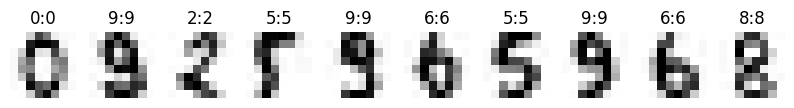

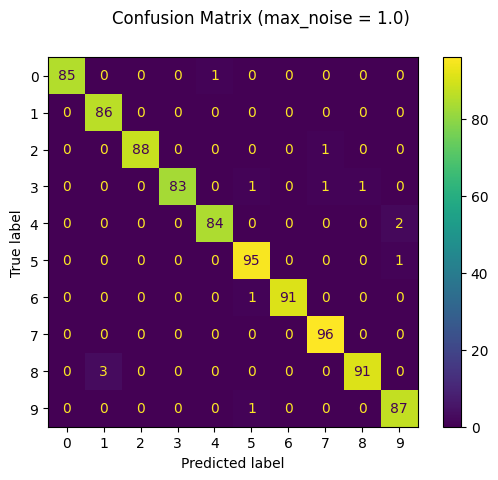

Confusion matrix:
[[99  0  0  0  0  0  0  0  0  0]
 [ 0 91  0  0  0  0  0  0  0  0]
 [ 0  0 97  0  0  0  0  0  1  0]
 [ 0  0  0 80  0  0  0  1  0  0]
 [ 0  0  0  0 87  0  0  0  0  0]
 [ 0  0  0  0  0 77  0  0  0  2]
 [ 0  1  0  0  0  0 95  0  0  0]
 [ 0  0  0  0  0  0  0 92  0  1]
 [ 0  3  0  0  0  0  0  1 80  0]
 [ 0  0  0  0  0  2  0  1  0 88]]


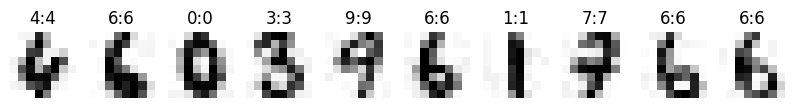

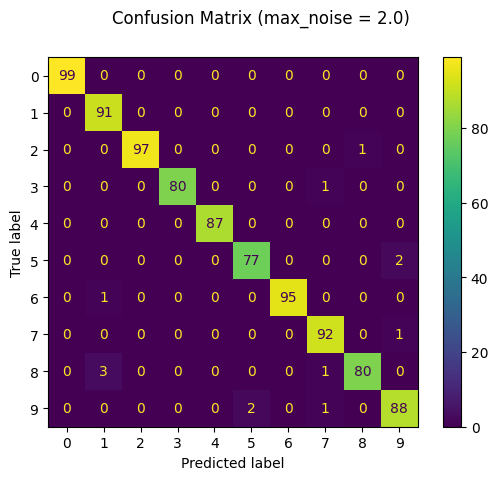

Confusion matrix:
[[ 83   0   0   0   0   0   0   0   0   0]
 [  0 101   0   0   0   1   0   0   2   0]
 [  0   0  86   2   0   0   0   1   1   0]
 [  0   0   1  81   0   1   0   0   1   1]
 [  0   0   0   0  85   0   0   1   3   0]
 [  0   0   0   0   1  77   0   0   0   0]
 [  0   1   0   0   0   0  90   0   1   0]
 [  0   0   0   0   0   0   0 100   0   0]
 [  0   5   0   0   0   0   1   0  73   1]
 [  0   0   0   2   0   0   0   2   4  90]]


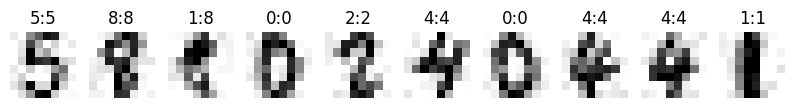

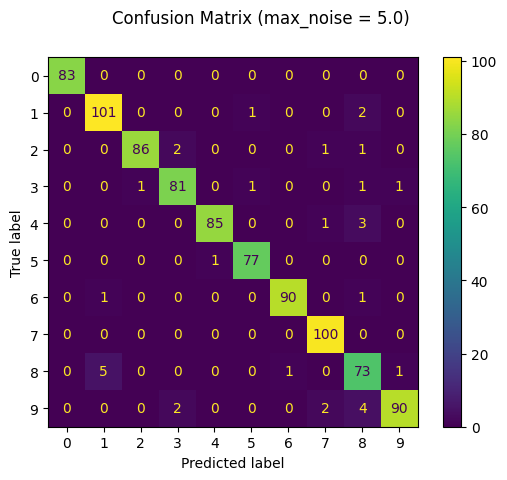

Confusion matrix:
[[74  0  0  0  1  0  0  0  1  3]
 [ 0 80  1  0  1  1  1  3  8  5]
 [ 1  4 62  0  0  0  0  1  4  0]
 [ 0  3  2 70  0  2  0  4  5 10]
 [ 0  2  0  0 82  0  1  4  1  1]
 [ 2  2  1  3  1 85  0  1  1  7]
 [ 0  1  2  0  1  1 82  0  3  0]
 [ 0  0  0  0  2  1  0 83  1  1]
 [ 1  9  1  5  0  3  2  2 67  4]
 [ 4  0  2 10  2  0  0  2  1 65]]


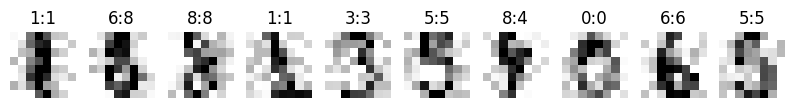

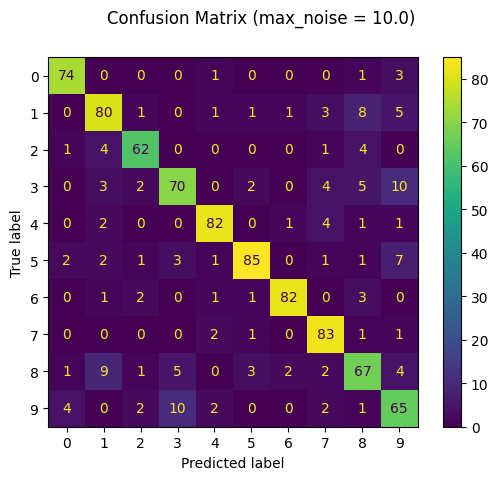

Confusion matrix:
[[39  0  1  1  6  5 11  1  0 21]
 [ 4 13  0  3 22  3 25  3  1 23]
 [ 3  4 22  8  3  5 15  8  0 26]
 [ 5  1  1 27  2  6 10  6  1 33]
 [ 8  2  0  0 52  2 15  5  0  4]
 [ 7  6  1  5  3 27 15  5  0 23]
 [ 4  7  0  2  9  3 47  2  0  9]
 [ 6  2  5  7 15  9  8 31  1  9]
 [ 7  6  2  3 13  8 22  5  1 25]
 [ 8  2  1  5  9  8  4  5  0 41]]


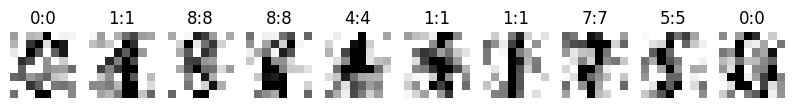

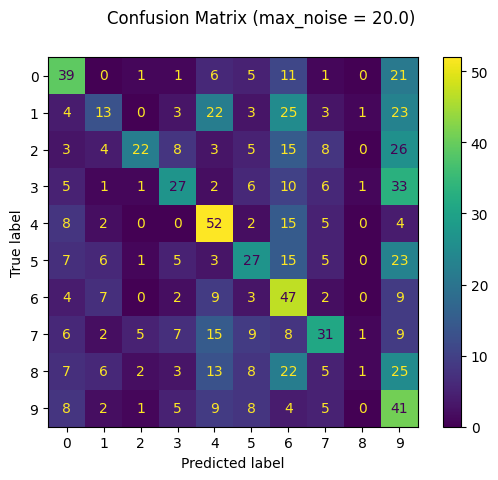

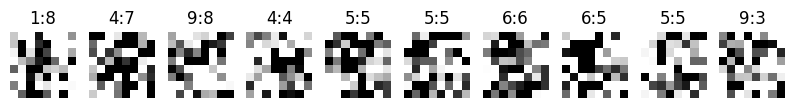

In [4]:
# Now let's add some noise
# The value of the data array varies between 0 and 16; we use this to guide
# the choice of the noise level
for max_noise in [0., 0.1, 0.2, 0.5, 1., 2., 5., 10., 20.]:
    data_noisy = np.clip(data + max_noise*2.*(np.random.sample(data.shape) - 0.5), 0, 16)
    clf = svm.SVC(gamma=0.001) # we need to reinitialize the SVM
    X_train, X_test, y_train, y_test = train_test_split(
        data_noisy, digits.target, test_size=0.5, shuffle=True
    )
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.figure_.suptitle("Confusion Matrix (max_noise = " + str(max_noise) + ")")
    print(f"Confusion matrix:\n{disp.confusion_matrix}")
    plt.show()
    _, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 5))
    for ax, image, prediction, label in zip(axes, X_test, predicted, y_test):
        ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"{prediction}:{label}")

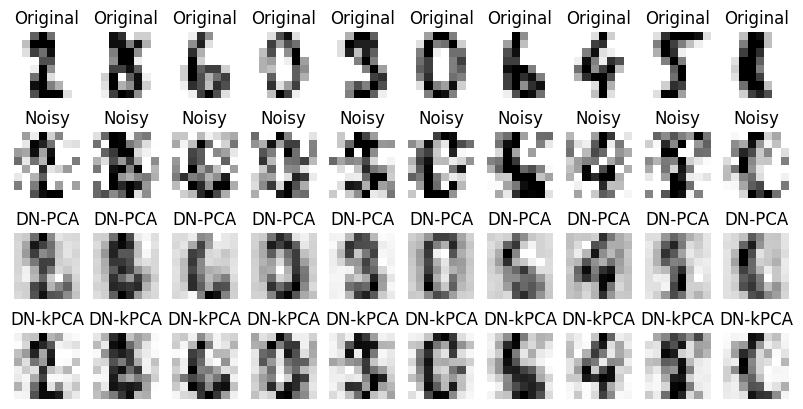

In [5]:
# And now let's denoise these images using PCA
max_noise = 10.
data_noisy = np.clip(data + max_noise*2.*(np.random.sample(data.shape) - 0.5), 0, 16)
i_list = list(range(len(data)))
np.random.shuffle(i_list)
X_train = data_noisy[i_list[10:]]
X_test = data_noisy[i_list[0:10]]
X_original = data[i_list[0:10]]
N_dim = 10
pca = PCA(n_components=N_dim, random_state=42) # We ask PCA to identify the N_dim dimensions containing the most info
pca.fit(X_train)
# Try also kernel PCA
N_dim = 100
kernel_pca = KernelPCA(
    n_components=N_dim,
    kernel="rbf",
    gamma=1e-3,
    fit_inverse_transform=True,
    alpha=5e-3,
    random_state=42,
)
_ = kernel_pca.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test)) # We project the N_dim representation back to the 64D space
X_reconstructed_kpca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

_, axes = plt.subplots(nrows=4, ncols=10, figsize=(10, 5))
for ax, image in zip(axes[0], X_original):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Original")
for ax, image in zip(axes[1], X_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Noisy")
for ax, image in zip(axes[2], X_reconstructed_pca):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"DN-PCA")
for ax, image in zip(axes[3], X_reconstructed_kpca):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"DN-kPCA")